## Week 13: Additional exercises on Keras

Before looking at deep reinforcement learning, we will review some of the commands from keras. 

### Exercise 1. Warm up

As a first exercise, try to fit the dataset below using 

- __1.__ A neural network from scikit-learn 
- __2.__ A neural network from Keras

Recall that in keras, just as scikit-learn, fitting the model to the data is done through a call to the method .fit. A call to the method .predict can then be used to validate the model on the test set.


You can choose different activation functions and losses. Also try different number of layers and numbers of neurons.  

(100, 5)
(100, 5)
(5, 100)


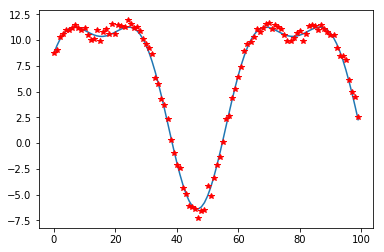

In [21]:
import numpy as np 
import matplotlib.pyplot as plt

# generating a random polynomial 
x = np.linspace(0,10,100)
x = np.sin(x)
y = np.random.normal(2, 5, 5)
expo1 = np.arange(0,len(y))

expo2 = np.tile(expo1, (len(x),1 ))
y2 = np.tile(y, (len(x),1 ))
x2 = np.tile(x, (len(y),1 ))

print(np.shape(expo2))
print(np.shape(y2))
print(np.shape(x2))

x2 = x2.T

out1 = np.power(x2, expo2)
out1b = np.multiply(out1, y2)
out1c = np.sum(out1b, axis=1)

plt.plot(out1c.flatten())


out1d = out1c + np.random.normal(0, .4, len(out1c))

plt.plot(out1d.flatten(), '*r')
plt.show()





In [ ]:
# build your keras neural network here

from keras.models import Sequential
model = Sequential()


### Exercise 2. A detour through conv nets

As we saw earlier, neural network have become particularly interesting for two main applications:
    
   - Text processing 
   - Image processing 
    
In the second framework, one architecture in particular, convolutional neural networks, has revealed especially powerful. In convolutional neural network, instead of simple linear combinations of the outputs to the previous layers, each layer outpus an image and each neuron computes the convolution of particular filters with this image. Go to Kaggle and download the [German Traffic Sign Recognition Benchmark](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign) (GTSRB). In this exercise we will study how to use convolutional neural net to discriminate between road signs. 

The functions below (courtesy of Sasank Chilamkurthy) can be used to preprocess the images and extract their labels. 

Don't forget to modify the link to your GTSRB folder.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from shutil import copyfile, rmtree
from timeit import default_timer as timer

Use the lines below to display the info on the training data. 

In [ ]:
train_info = pd.read_csv(from_input("Train.csv"))
train_info.head()


test_info =  pd.read_csv(from_input("Test.csv"))
test_info.head()

The images have different size and in order to apply our network to the dataset, we thus first need to crop every image to some predefined size. We decide to fix this size to (40,40). Start by truncating the images from the dataset to this predefined size. 

In [ ]:
for i, f in number_images

    image = 0 # load the image  
    resized_image = 0# crop the image to the appropriate (40,40) size
    data.append(np.array(resized_image))


X_train = np.array(data).astype('float32') / 255.0

Store the labels corresponding to your image (make sure the labels are sorted) in a vector y_train. Then turn those labels into categorical encodings using the line below 

In [ ]:
y_train = to_categorical(y_train, 43)

We will now build a convolutional network with Keras. We don't need it to be too large. Take a Sequential model. 

 - Start with layers of 2D convolutions with 3 by 3 filters and Relu activation functions. The size of the input should be the size of the cropped images extended with a third dimension which we will use to encode the RGB triples 

 - Add a 2 by 2 pooling layer (Do you remember what pooling does ?)
 - flatten the output
 - Finally add a dense layer. This layer should output a vector of size equal to the number of different road signs. We want the final output to be binary so you can choose the activation but the softmax is good one for this framework.  
 
Once you have assembled the model, check its structure with 'model.summary()' 

In [ ]:
model = tf.keras.models.Sequential() # Add the model structure 

model.summary()

Before we can train the model, we need to specify the optimization algorithm we want to use (whether we use GD, SGD, how many samples we want in each batch and so on). This is done through a call to the compile function of your model. 

- We will use ADAM as our optimization routine, 
- We wil take a categorical crossentropy loss (extension of binary cross entropy to the multiclass problem):

$$\ell(w) = -\frac{1}{N}\sum_{\mathcal{C}}\sum_{i=1}^N  I_{x_i\in \mathcal{C}}\; log(y(x_i))$$

'i' runs over the samples in the batch. $\mathcal{C}$ encodes the classes (different  road signs here) in the model. $I_{x_i\in \mathcal{C}}$ is the indicator function of the class $\mathcal{C}$ which turn to $1$ when $x_i\in \mathcal{C}$ and $0$ otherwise. 

- We set the 'metrics' to accuracy which means we maximize the number of correct classifications. 


You can use the function 'tf.keras.utils.plot_model' to get a visual representation of your model